#### $$\textbf{Solving ODE using Euler method} , 4^{th} \textbf{order Runge Kutta method} , \textbf{scipy.integrate.odeint()} $$

Q1.  Solve the functions: $ \large\displaystyle\frac{\text{d}x}{\text{dt}}=\sin x $

 Implement : $\displaystyle{\qquad a) \ \textbf{Euler’s method }  \quad
              b) {\ } 4^{th} \textbf{order Runge Kutta  Method }}$ 
 
 Given condition for : $ \displaystyle\large{ x_0 = [ 0.1,1.55,4{}]},$ Superpose these three curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        j = j + h * f(j,t)
        t = t + h
        X.append(j)
        T.append(t)
    return T ,X  

def runge_kutta4(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        k1 = f(j,t)
        k2 = f(j + (h/2)*k1 , t + (h/2))
        k3 = f(j + (h/2)*k2 , t + (h/2))
        k4 = f(j + h*k3 , t + h)
        j = j + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t = t + h
        X.append(j)
        T.append(t)
    return T, X

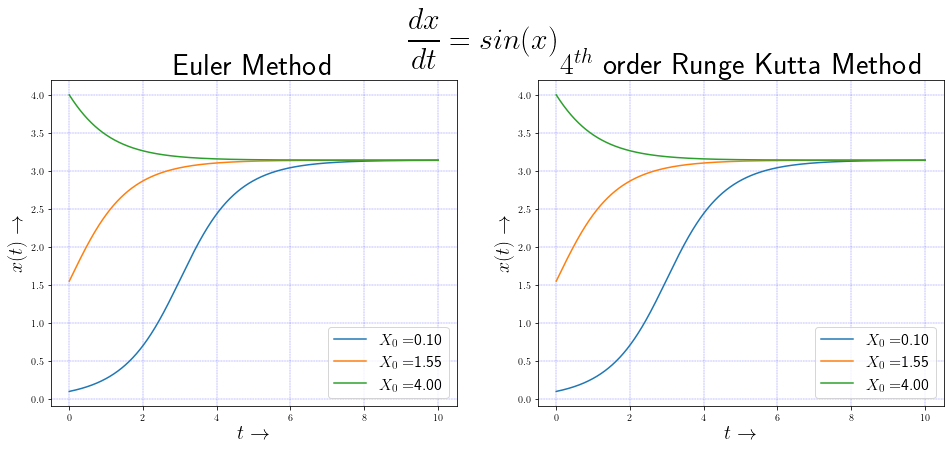

In [2]:
def f(x,t):
    return np.sin(x)
                                 
x0 = [0.1,1.55,4]    
h,t0,tmax = 0.01,0.,10.   # 𝑡_0 → start time,𝑡_𝑚𝑎𝑥 → max time period,ℎ → step size            
n = (tmax-t0)/h           # 𝑛 → no. of steps

plt.rcParams['text.usetex'] = True
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
for j in x0:
    ax1.plot(euler(f,j,n)[0],euler(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax1.set_xlabel(r'$t \rightarrow$',size='20')
    ax1.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax1.grid(color='b', ls = '-.', lw = 0.25)
    ax1.set_title('Euler Method',size=30)
    ax1.legend(fontsize=16,loc='lower right')
    ax2.plot(runge_kutta4(f,j,n)[0],runge_kutta4(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax2.set_xlabel(r'$t \rightarrow$',size='20')
    ax2.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax2.grid(color='b', ls = '-.', lw = 0.25)
    ax2.set_title('$4^{th}$ order Runge Kutta Method',size=30)
    ax2.legend(fontsize=16,loc='lower right')
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=sin(x)$",size=30,y=1.05)
plt.show()

Q2. Solve the eqn  : $ \large \frac{\text{d}x}{\text{dt}} = -xt^2 $

Implement a) using $\textbf{Euler method}\quad$b) $ \ 4^{th} \textbf{order Runge-Kutta method}$
$ \\ $Use this fact to calculate : $  \text{ E(t)}=|x_{\text{numerical}} (t)-x(t)|$
$ \\ \displaystyle{\therefore E=h^m => \ln E=m \ln h => Y=m*X+C \\ \text{where } Y= \ln E , \text{and } X= \ln h , \text{and } C=\text{const.}} \\$
For different values of $h$. Find the power of $h$ with which $\text{E(t)}$ is proportional.



$\displaystyle{x_0\rightarrow \text{  initial conditions of dependent variable} \\
 n\rightarrow \text{ no. of steps} \\
 t_0\rightarrow \text{ given initial condition} \\
 t_{max}\rightarrow \text{ Given max value of independent variable} \\
 h\rightarrow \text{ step size} = \frac{(t_{max}-t_0)}{n}\\
 x_{analytical}\rightarrow |\text{analytical value of the solution }|_{t} }$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True

def Euler(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            x = x + h[i] * f(x,t)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

def Runge_Kutta4(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            k1 = f(x,t)
            k2 = f(x + (h[i]/2) * k1 , t + (h[i]/2))
            k3 = f(x + (h[i]/2) * k2 , t + (h[i]/2))
            k4 = f(x + h[i] * k3 , t + h[i])
            x = x + (h[i]/6) * (k1 + 2*k2 + 2*k3 + k4)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

In [25]:
from sympy import *
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t**2)
print('Given choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

Given choice is  :


Eq(Derivative(x(t), t), -t**2*x(t))

general soln. :


Eq(x(t), C1*exp(-t**3/3))

particular soln. :


Eq(x(t), 10*exp(-t**3/3))

Eq(x(2), 0.694834512228015)

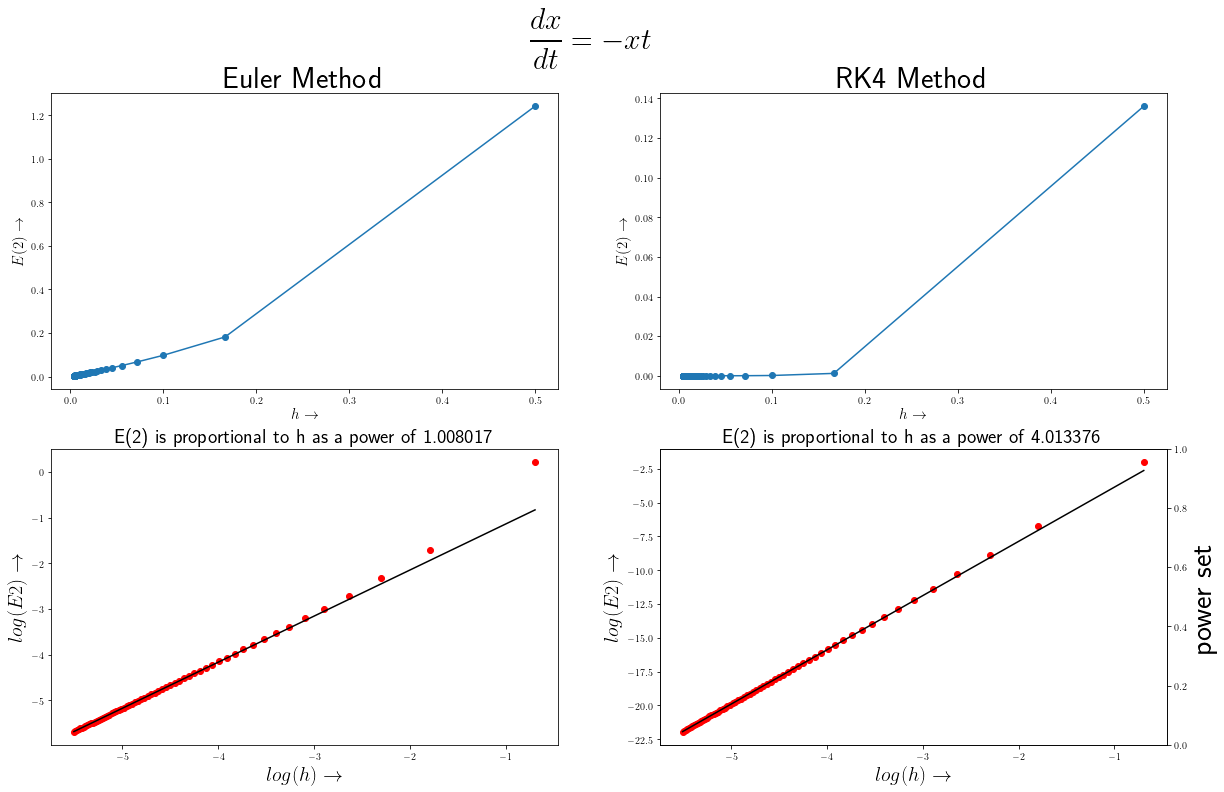

In [29]:
def f(x,t):
    return -x*t**2

n = np.arange(4,500,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n     
x_analytical = 0.694834512228015 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q3. Repeat 2 with another function of your choice function of your choice:  

In [27]:
from sympy import *
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t)
print('My choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

My choice is  :


Eq(Derivative(x(t), t), -t*x(t))

general soln. :


Eq(x(t), C1*exp(-t**2/2))

particular soln. :


Eq(x(t), 10*exp(-t**2/2))

Eq(x(2), 1.35335283236613)

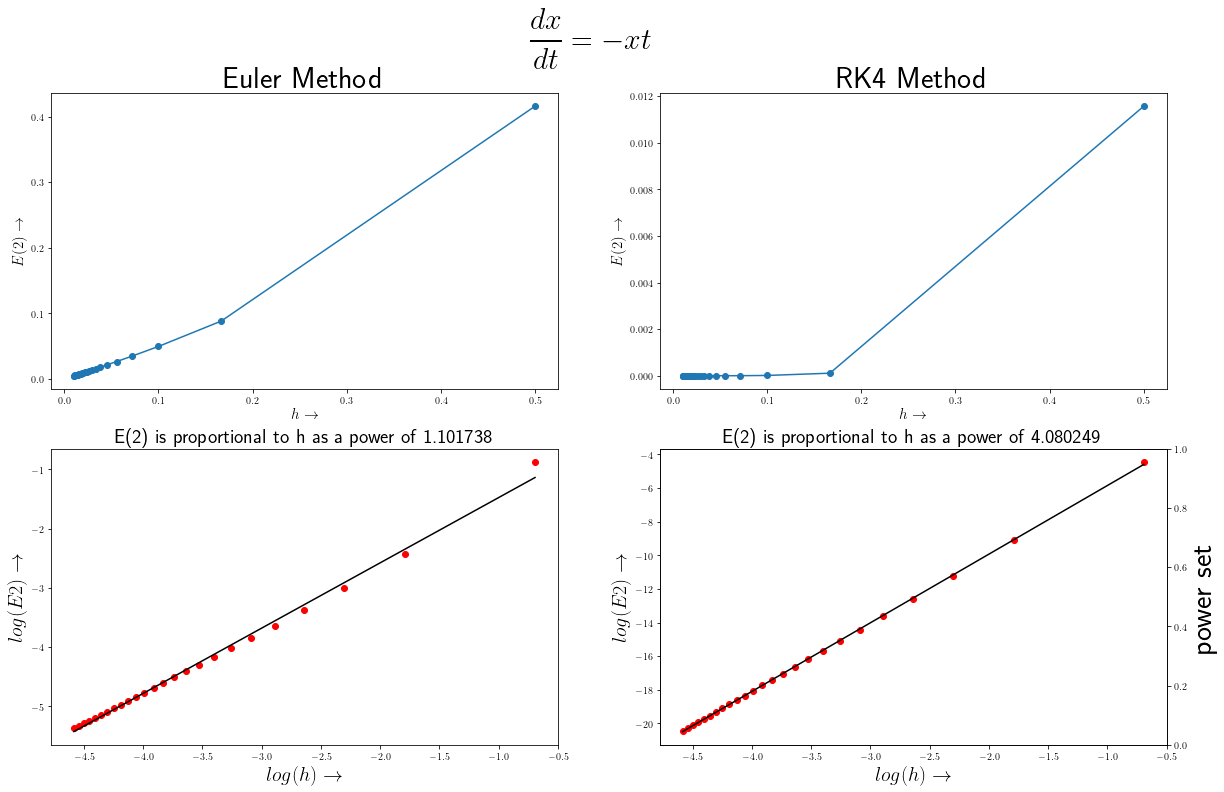

In [28]:
def f(x,t):
    return -x*t

n=np.arange(4,200,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n
x_analytical = 1.35335283236613 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q4.Solve : $ \large \frac{\text{d}x}{\text{dt}}=x(1-x),\qquad$using **scipy.integrate.odeint()**

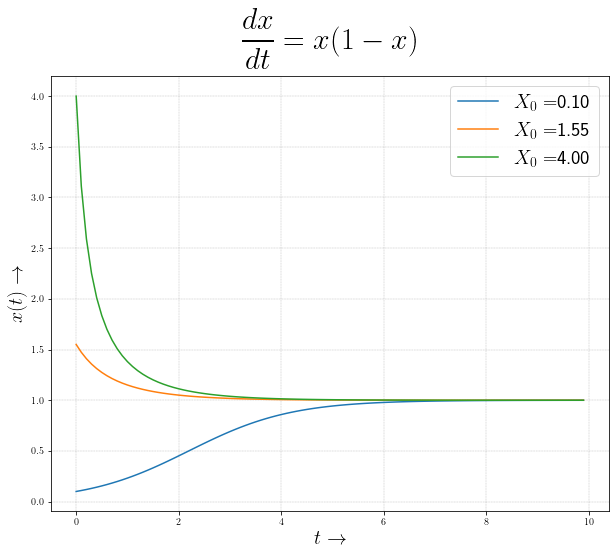

In [16]:
import numpy as np
import scipy.integrate as SI
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

def f(x,t):
    return x*(1-x)

t = np.arange(0,10,0.1)
x0 = [0.1,1.55,4]   
plt.rcParams['text.usetex'] = True
for j in x0:
    x = SI.odeint(f,j,t)
    plt.plot(t,x,label = '$X_0 =$%.2f'%j)
plt.xlabel(r'$t \rightarrow$',size='20')
plt.ylabel(r'$x(t) \rightarrow$',size=20)
plt.title(r"$\displaystyle\frac{dx}{dt}=x(1-x)$",size=30,y=1.051)
plt.legend(fontsize = 20,loc='upper right')
plt.grid(color = 'grey', ls = '-.', lw = 0.25)
plt.show()

$\displaystyle{Q5.\text{ Solve the motion of a particle thrown vertically upward with a velocity} :}$
$$\displaystyle{ m \frac{\text{d}^{2}x}{\text{dt}^{2}}=-mg }$$
$\displaystyle{\text{Take }x_{0}=0,u=10m/s, g=9.8 m/s^{2}, m = 1 \\
\text{Compare this with theoritical curve }: x=ut-\frac{1}{2}gt^{2}
\\ \text{Implement }: \
a) \ \text{Euler method} \quad
b) \ 4^{th} \text{order Runge Kutta method} \quad
c) \ \text{scipy.integrate.odeint()}}$

In [3]:
import numpy as np
import scipy.integrate as SI
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')    #suppress warnings

def Euler(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        x = x + h*f(x,T)
        X.append(x[0])
        U.append(x[1])
    return X,U    

def RK4_method(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        k1 = f(x,i)
        k2 = f(x + (h/2)*k1 , i + (h/2))
        k3 = f(x + (h/2)*k2 , i + (h/2))
        k4 = f(x + h*k3 , i + h)
        x = x + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        X.append(x[0])
        U.append(x[1])
    return X,U

def SIO_method(f,x,T):
    s = SI.odeint(f,x,T)
    X,U = s[:,0], s[:,1]
    return X,U

In [4]:
def f(X,t):
    x = X[0]
    u = X[1]
    dx = u
    du = -g
    return np.array([dx,du])

x0 = 0                        # initial conditions of position variable 
u0 = 10                       # initial conditions of velocity variable 
n  = 10                       # no. of steps
g  = 9.8                      # accleration due to gravity
h  = 0.0001                   # step size
t  = 0                        # initial start time
tmax =  2*u0/g                # final end time
T = np.arange(t,tmax+h,h)     # time space
n = len(T)-1                  # no. of steps
x = np.array([x0,u0])         # initial conditions of dependent variable

X_analytic = u0*T-(g*T*T)/2
V_analytic = u0-(g*T)

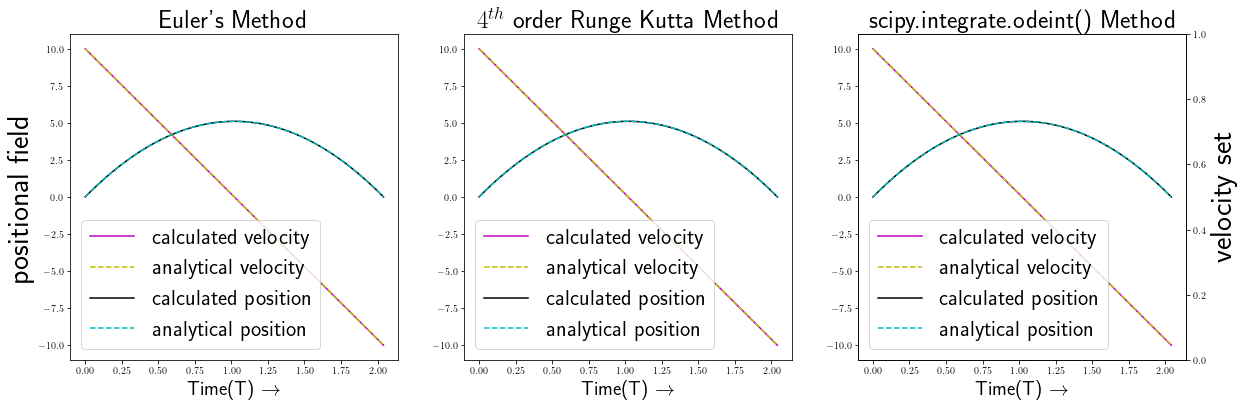

In [6]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(131)
plt.plot(T,Euler(f,x,T,n,h)[1],'m',T,V_analytic,'y--', T,Euler(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.ylabel("positional field", fontsize=30)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title(" Euler's Method ",fontsize=25)
plt.subplot(132)
plt.plot(T,RK4_method(f,x,T,n,h)[1],'m',T,V_analytic,'y--', T,RK4_method(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.subplot(133)
plt.plot(T,SIO_method(f,x,T)[1],'m',T,V_analytic,'y--', T,SIO_method(f,x,T)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title('scipy.integrate.odeint() Method ',fontsize=25)
plt.twinx()
plt.ylabel('velocity set',fontsize=30)
plt.show()

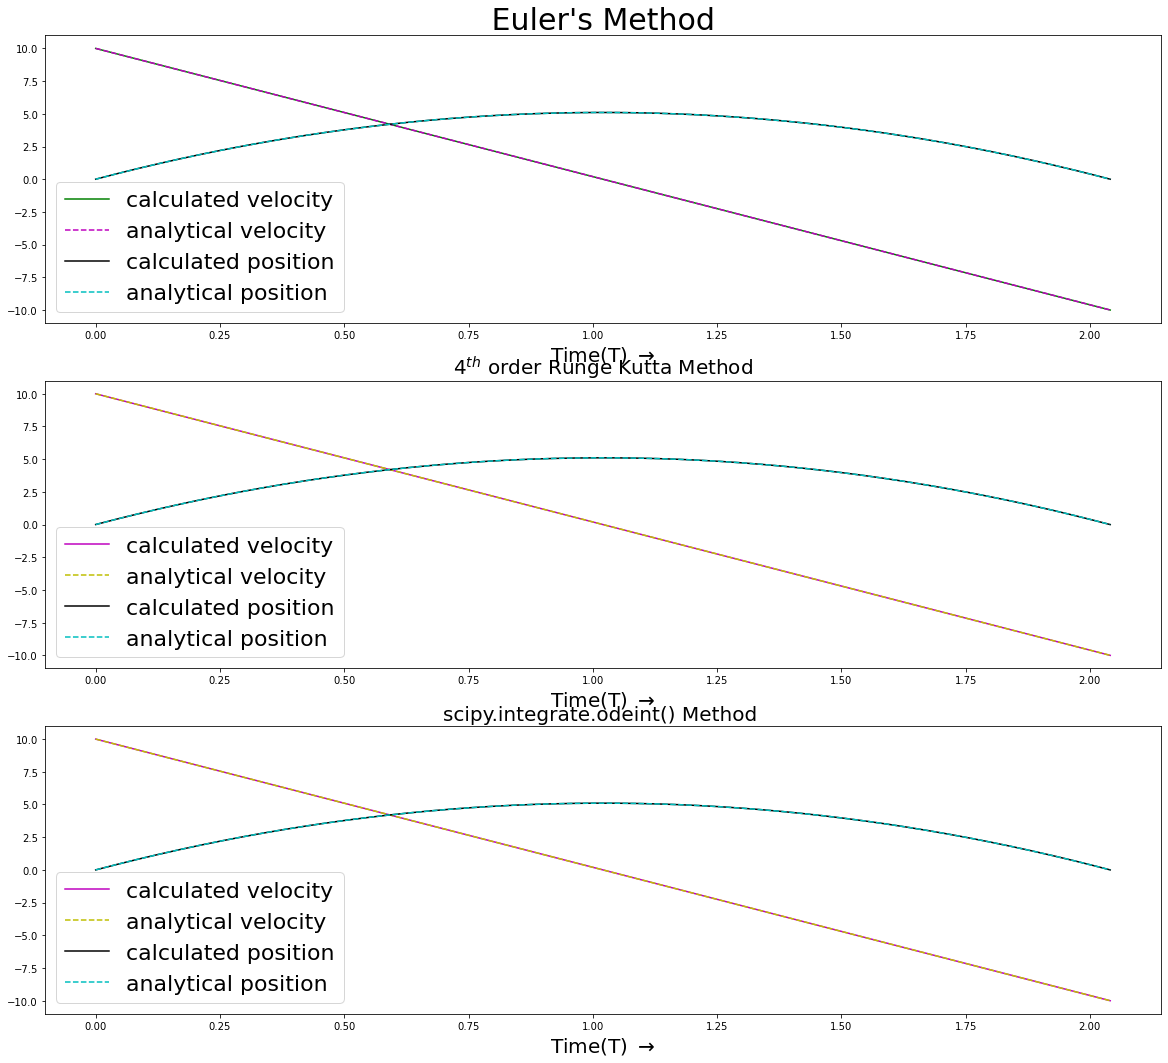

In [4]:
plt.rcParams["figure.figsize"] = (20,18)
plt.subplot(311)
plt.plot(T,Euler(f,x,T,n,h)[1],'g',T,V_analytic,'m--', T,Euler(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title(" Euler's Method ",fontsize=30)
plt.subplot(312)
plt.plot(T,RK4_method(f,x,T,n,h)[1],'m',T,V_analytic,'y--', T,RK4_method(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=20)
plt.subplot(313)
plt.plot(T,SIO_method(f,x,T)[1],'m',T,V_analytic,'y--', T,SIO_method(f,x,T)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=22)
plt.title('scipy.integrate.odeint() Method ',fontsize=20)
plt.show()

$\displaystyle{Q6.\text{Solve the motion of a} \textbf{ simple harmonic oscillator} \text{ for } :}$
$$\displaystyle{ m\frac{\text{d}^2 x}{\text{dt}^2}=-m\omega x }$$
$\displaystyle{\quad\text{Taking }m=1,\omega=1,x_0=1,v_0=0,g=9.8 m/s^2
\\ \text{Compare this with theoretical curve }: x=\cos \omega t \\ \text{ And also plot the phase plot (v-x) for } t_{max}=40\frac{\pi}{\omega} \\
\text{Implement }: \
a) \ \text{Euler method} \qquad
b) \ 4^{th} \text{order Runge Kutta method} \qquad
c) \ \text{scipy.integrate.odeint()}}$

In [9]:
def f(X,t):
    x = X[0]
    v = X[1]
    dx = v
    dv = -w**2*x
    return np.array([dx,dv])

x0 = 1         # initial conditions of position variable 
v0 = 0         # initial conditions of velocity variable 
w = 1          # natural angular frequency
h = 0.0001     # step size
g = 9.8        # accleration due to gravity
t = 0                  # initial start time
tmax = (40*np.pi)/w    # final end time
T = np.arange(t,tmax+h,h)  # time space
n = len(T)-1               # no. of steps
x = np.array([x0,v0])

X_analytic = np.cos(w*T)
V_analytic = np.sin(w*T)*(-w)

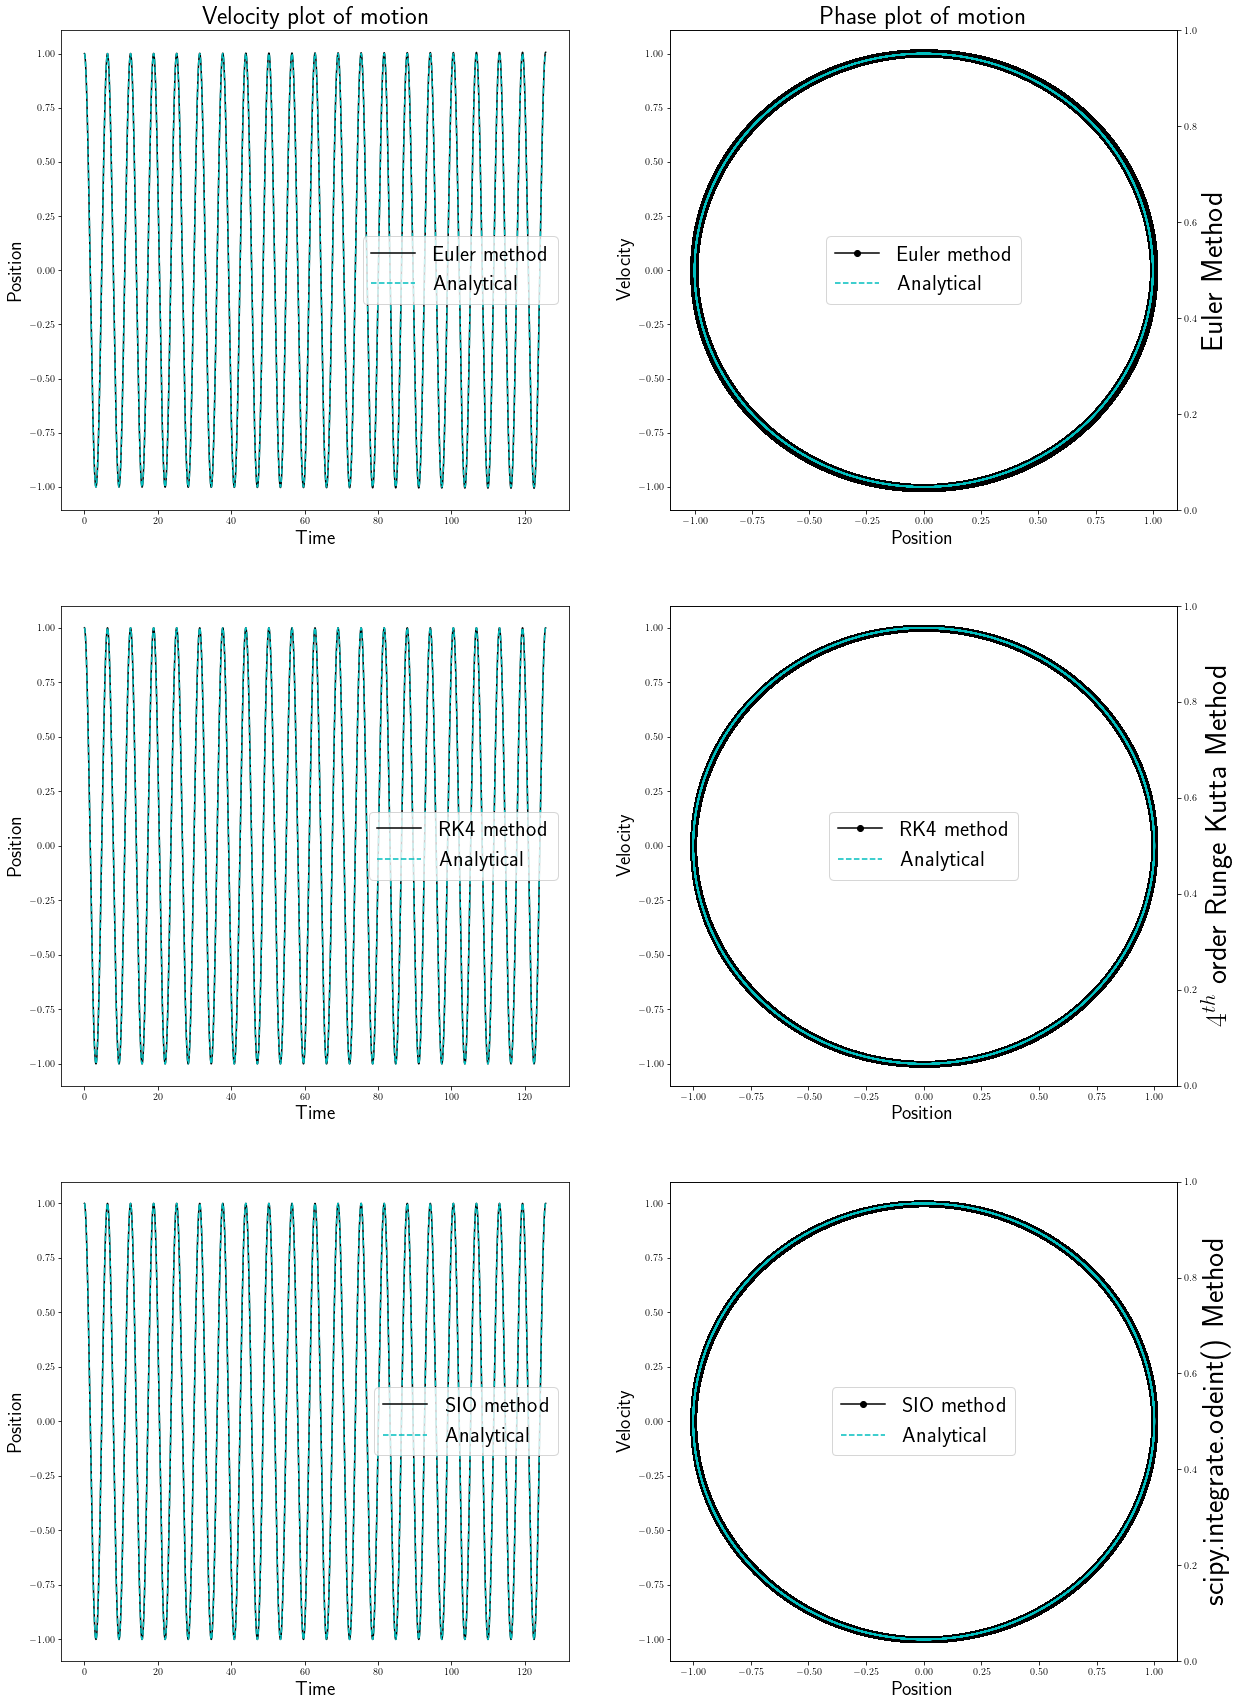

In [11]:
plt.rcParams["figure.figsize"] = (20,30)

plt.subplot(321)
plt.title('Velocity plot of motion',fontsize=25)
plt.plot(T,Euler(f,x,T,n,h)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(322)
plt.title('Phase plot of motion',fontsize=25)
plt.plot(Euler(f,x,T,n,h)[0],Euler(f,x,T,n,h)[1],'ko-',X_analytic,V_analytic,'c--')
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Euler Method',fontsize=30)

plt.subplot(323)
plt.plot(T,RK4_method(f,x,T,n,h)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(324)
plt.plot(RK4_method(f,x,T,n,h)[0],RK4_method(f,x,T,n,h)[1],'ko-',X_analytic,V_analytic,'c--')
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('$4^{th}$ order Runge Kutta Method',fontsize=30)

plt.subplot(325)
plt.plot(T,SIO_method(f,x,T)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)

plt.subplot(326)
plt.plot(SIO_method(f,x,T)[0],SIO_method(f,x,T)[1],'ko-',X_analytic,V_analytic,'c--')
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('scipy.integrate.odeint() Method',fontsize=30)
plt.show()

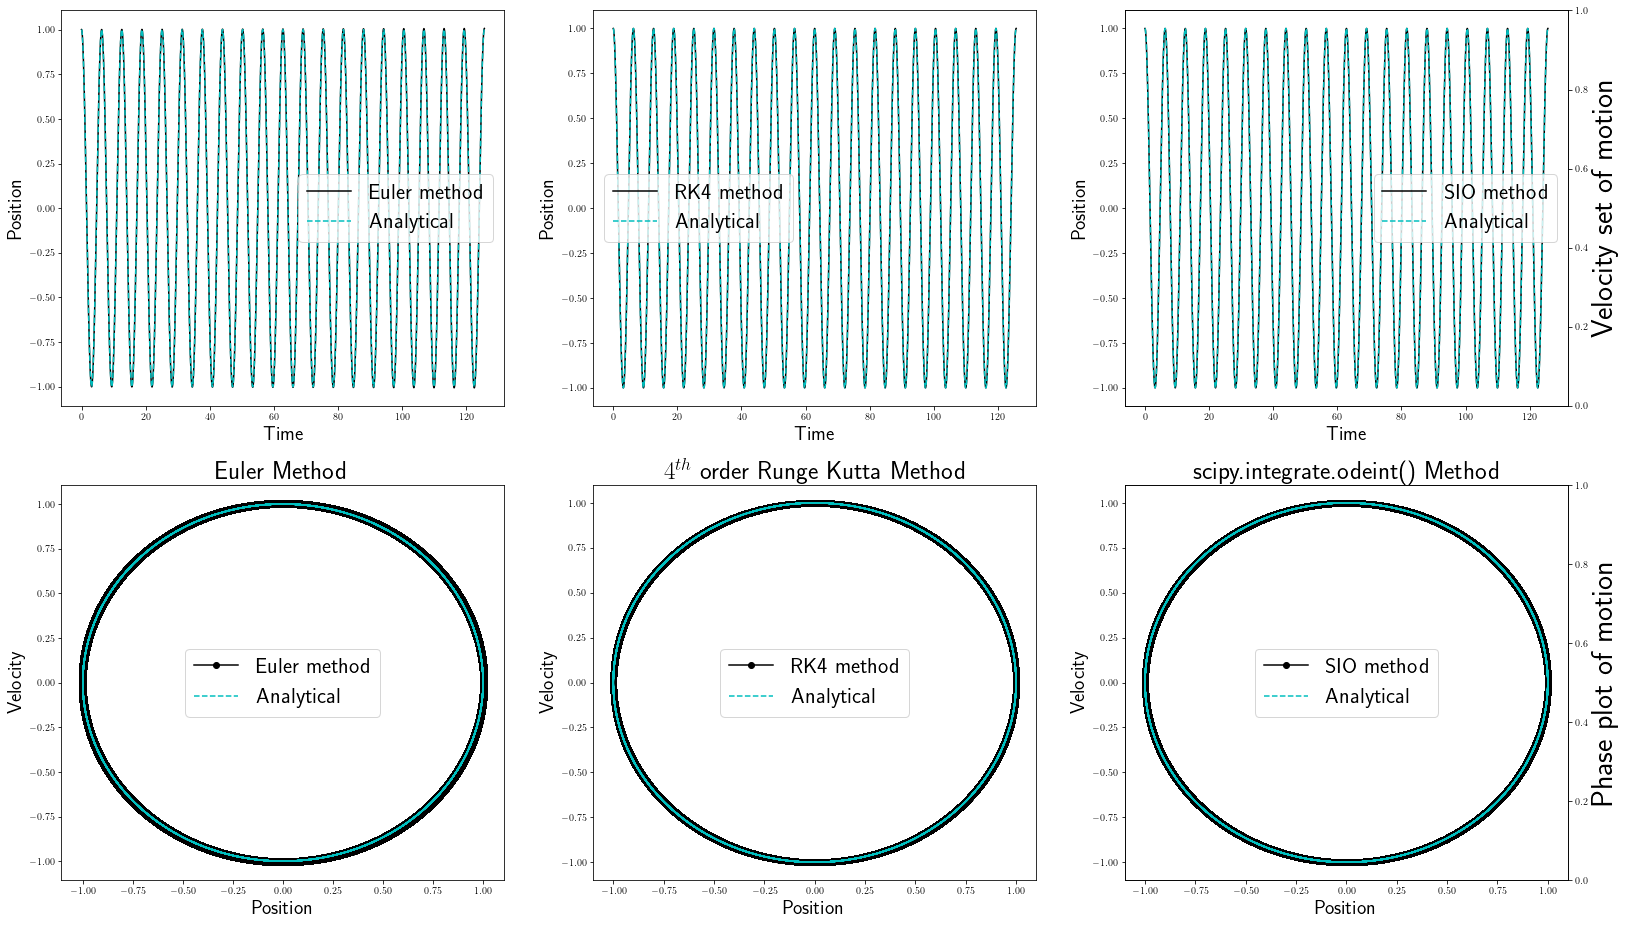

In [10]:
plt.rcParams["figure.figsize"] = (27,16)

plt.subplot(231)
plt.plot(T,Euler(f,x,T,n,h)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(232)
plt.plot(T,RK4_method(f,x,T,n,h)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(233)
plt.plot(T,SIO_method(f,x,T)[0],'k', T,X_analytic,'c--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Velocity set of motion',fontsize=30)

plt.subplot(234)
plt.plot(Euler(f,x,T,n,h)[0], Euler(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('Euler Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(235)
plt.plot(RK4_method(f,x,T,n,h)[0], RK4_method(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(236)
plt.plot(SIO_method(f,x,T)[0], SIO_method(f,x,T)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('scipy.integrate.odeint() Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Phase plot of motion',fontsize=30)

plt.show()

Q7. Solve **Harmonic Oscillator** with velocity proportional damping $2bv$, $m=1 :$
$$ \displaystyle{\large m\frac{\text{d}^{2}x}{\text{dt}^{2}}=-m\omega^{2}x-2mb\frac{\text{d}x}{\text{dt}}}$$

Plot $(x-t)$ curve as well as $(v-x)$ curve for $\displaystyle{b<\omega,b=\omega,b>\omega }$

$\displaystyle{\text{Implement }: \\
a) \ \text{Euler method} \\
b) \ 4^{th} \text{order Runge Kutta method} \\
c) \ \text{scipy.integrate.odeint()}}$

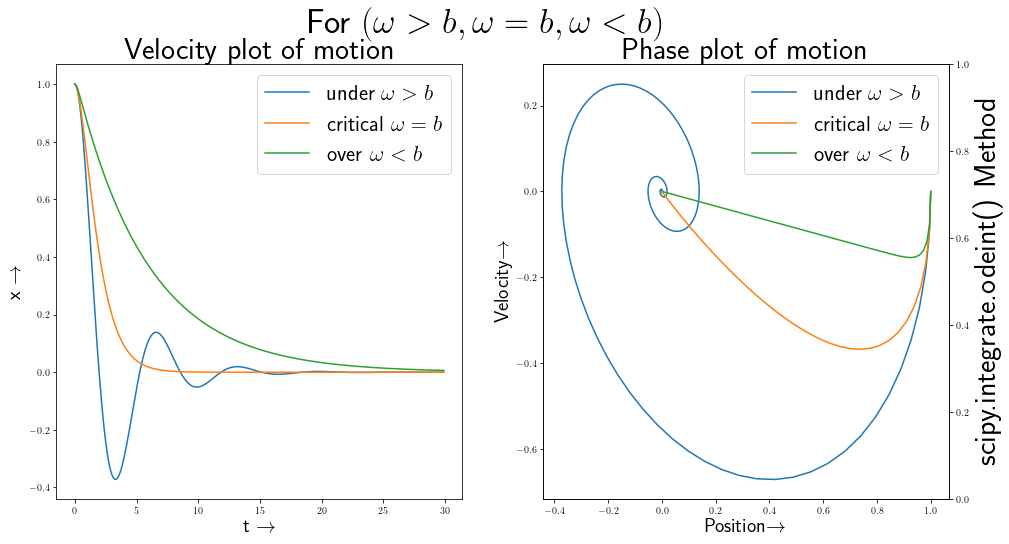

In [8]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -w**2*x - 2*b*v
    return np.array([dxdt,dvdt])

W = [ 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [ 0.3, 1.0, 3.0 ]       # damping factor b
X0 = [ 1, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.1) # time space
h = 0.1                     # step size
n = len(t)-1                # no. of steps

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (16,8)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.98)
for w,b in zip(W,B):
    plt.subplot(121)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.title('Velocity plot of motion',fontsize=30)
    
    plt.subplot(122)
    plt.title('Phase plot of motion',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('scipy.integrate.odeint() Method',fontsize=30)
plt.show()

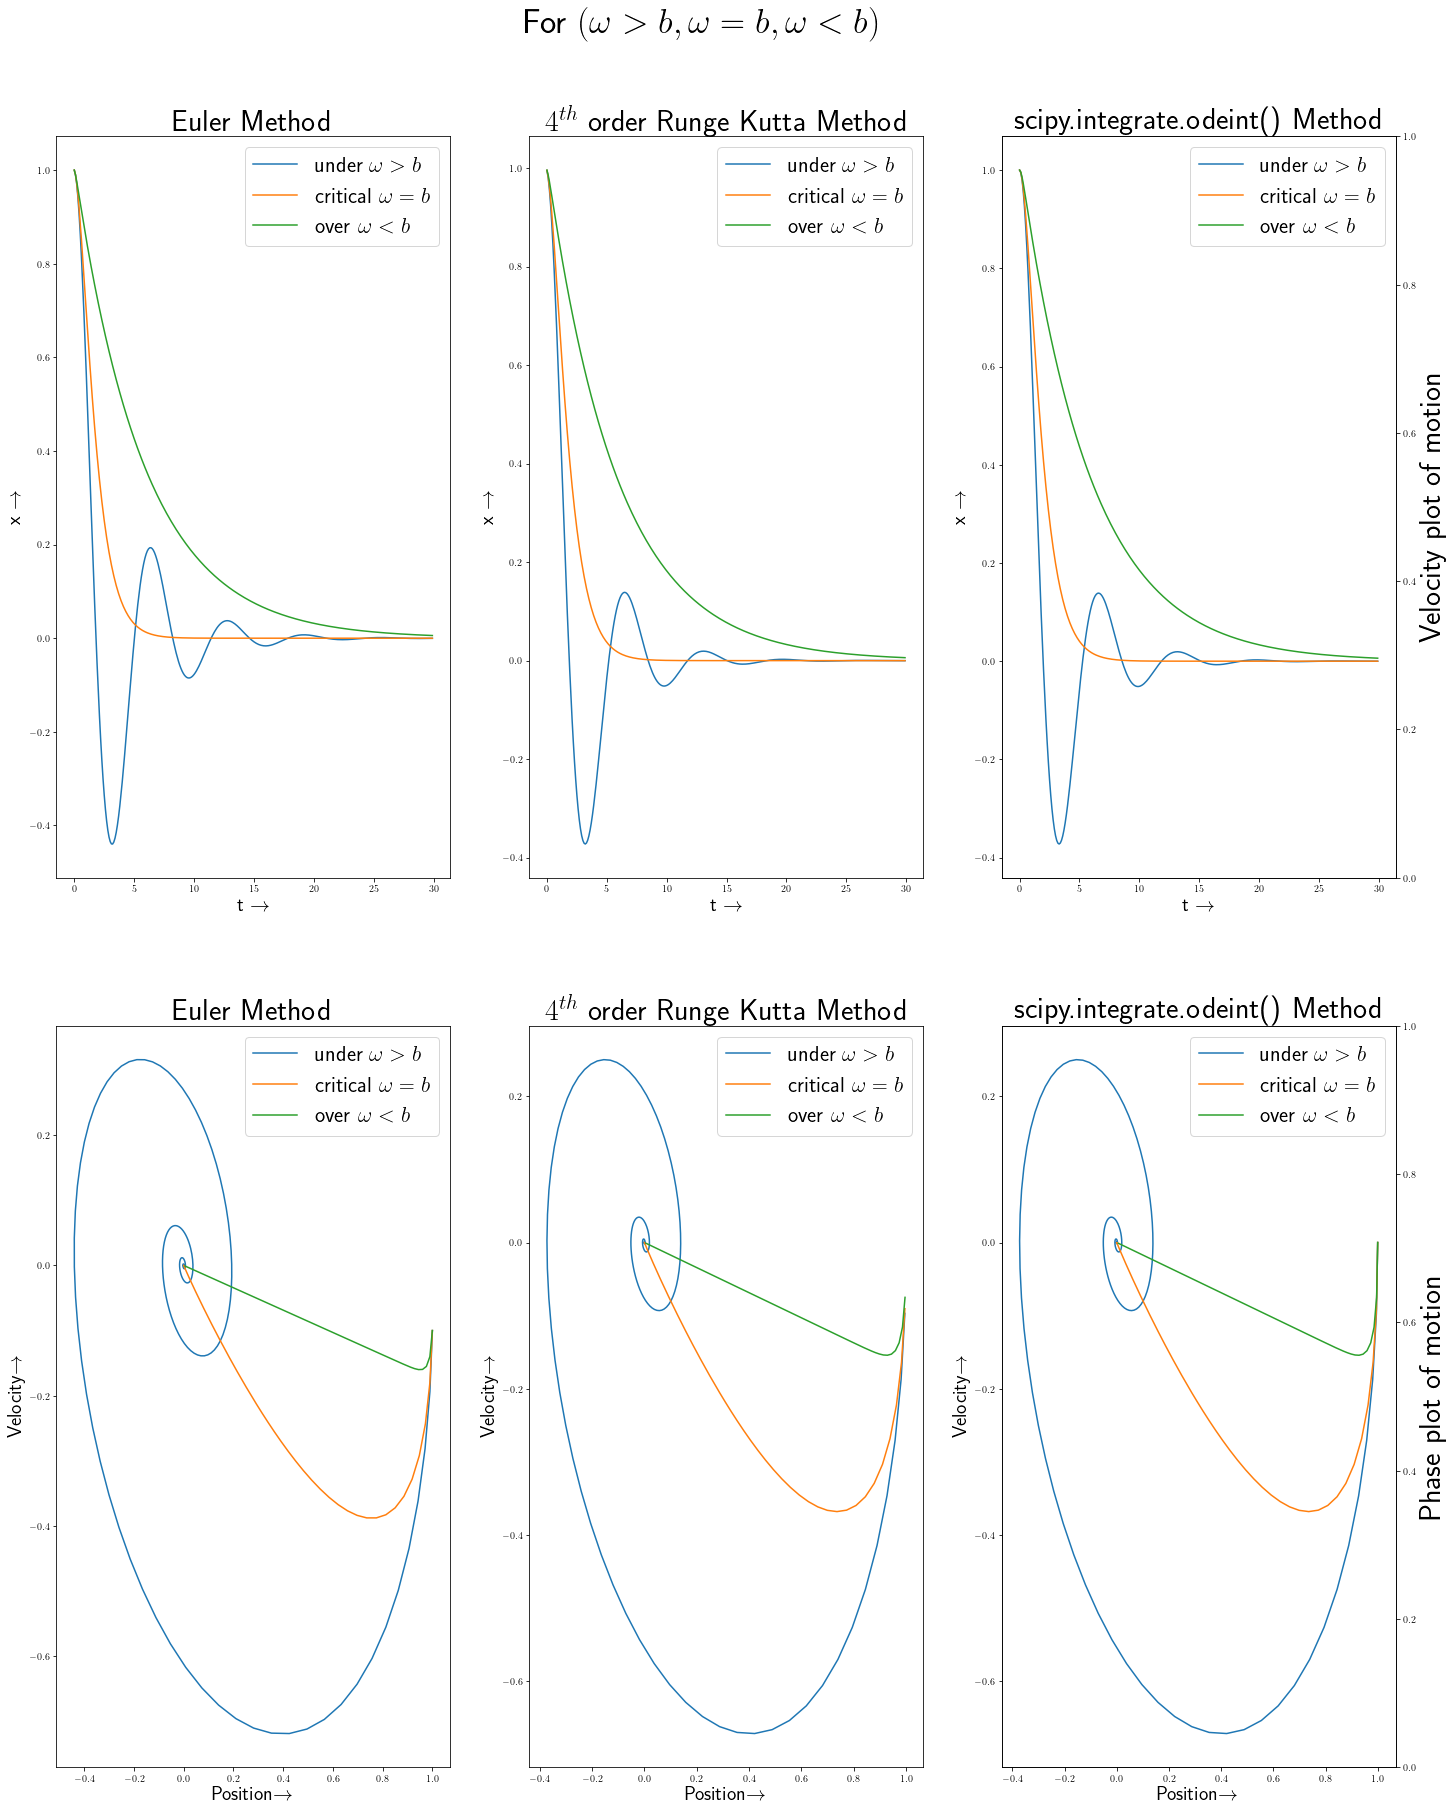

In [6]:
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (24,30)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.94)
for w,b in zip(W,B):
    plt.subplot(231)
    plt.title('Euler Method',fontsize=30)
    plt.plot(t,Euler(f,X0,t,n,h)[0])
    plt.xlabel(r"t $\rightarrow$",size=20)
    plt.ylabel(r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(232)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(t,RK4_method(f,X0,t,n,h)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(233)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.twinx()
    plt.ylabel('Velocity plot of motion',fontsize=30)
    
    plt.subplot(234)
    plt.title('Euler Method',fontsize=30)
    plt.plot(Euler(f,X0,t,n,h)[0],Euler(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(235)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(RK4_method(f,X0,t,n,h)[0],RK4_method(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(236)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('Phase plot of motion',fontsize=30)
plt.show()

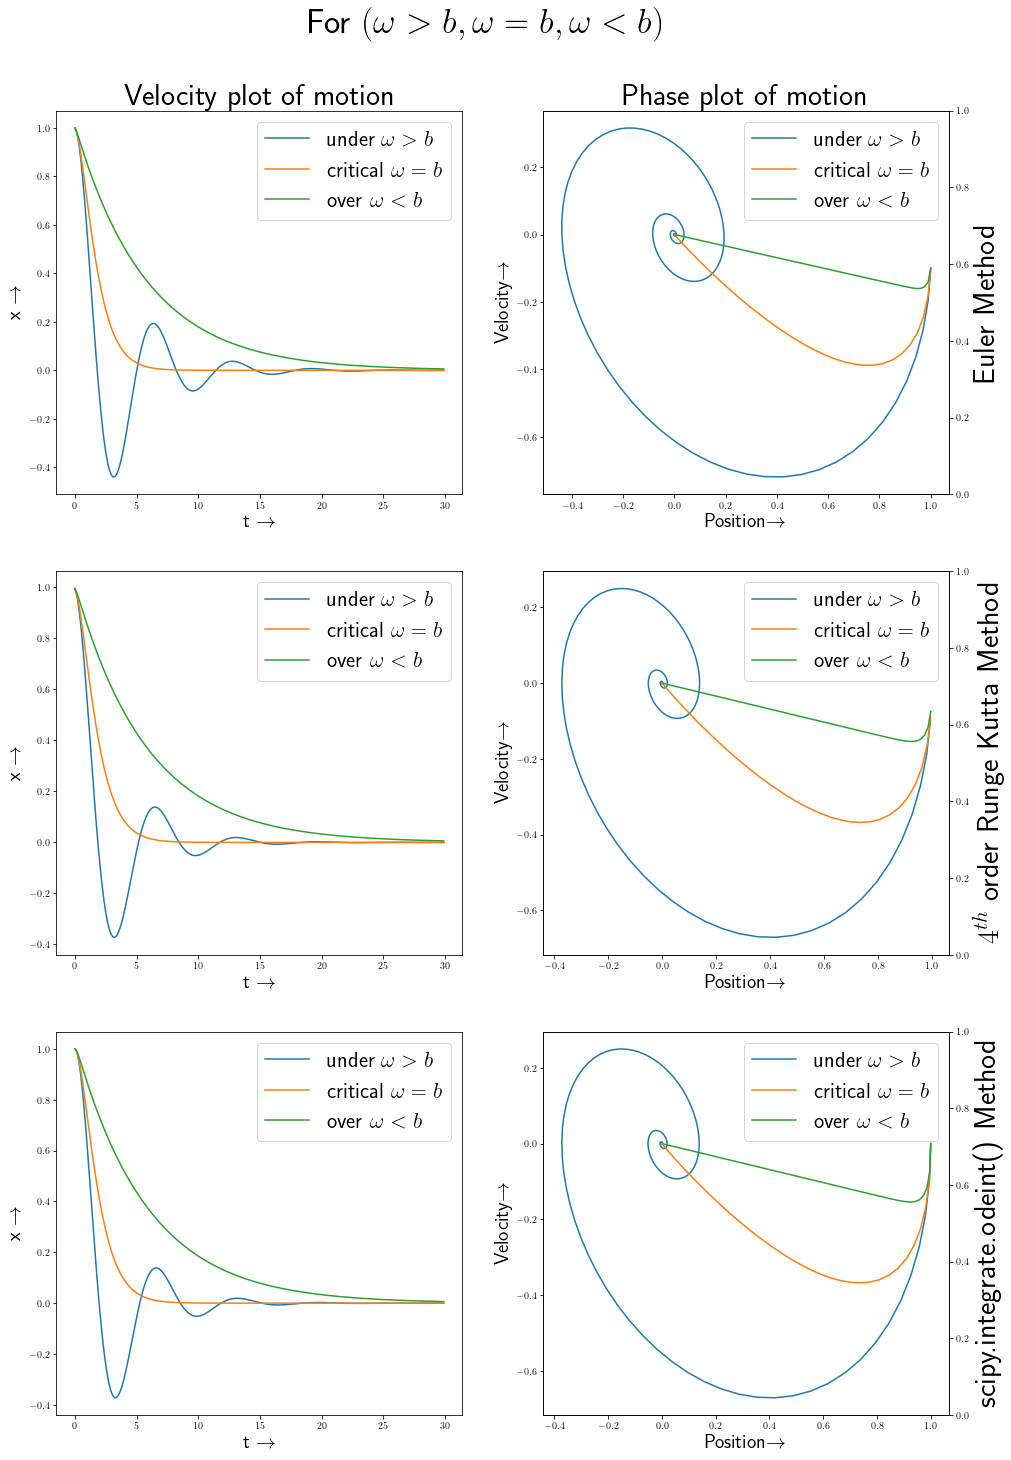

In [7]:
plt.rcParams["figure.figsize"] = (16,24)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.94)
for w,b in zip(W,B):
    plt.subplot(321)
    plt.plot(t,Euler(f,X0,t,n,h)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.title( 'Velocity plot of motion',fontsize=30)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(322)
    plt.plot(Euler(f,X0,t,n,h)[0],Euler(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.title( 'Phase plot of motion',fontsize=30)
    plt.twinx()
    plt.ylabel('Euler Method',fontsize=30)
    
    plt.subplot(323)
    plt.plot(t,RK4_method(f,X0,t,n,h)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(324)
    plt.plot(RK4_method(f,X0,t,n,h)[0],RK4_method(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('$4^{th}$ order Runge Kutta Method',fontsize=30)
    
    plt.subplot(325)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(326)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('scipy.integrate.odeint() Method',fontsize=30)
    
plt.show()